In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from load_signals import load_sleep_study

In [2]:
path_signal = 'sub-S0001111189359_ses-1_task-psg_eeg.edf'
path_annotations = 'sub-S0001111189359_ses-1_task-psg_annotations.csv'

# The files are stored on https://bdsp.io, however a sample file can be downloaded from Dropbox here:
filepath_csv_db = 'https://www.dropbox.com/scl/fi/8s6a6s9e4wnvuw8m6a4bn/sub-S0001111189359_ses-1_task-psg_annotations.csv?rlkey=p0g4d330c8opkmwbf091z57bf&st=jt8n9pjg&dl=1'
filepath_edf_db = 'https://www.dropbox.com/scl/fi/p0bxi9v755or6m5z11alv/sub-S0001111189359_ses-1_task-psg_eeg.edf?rlkey=o5dam3o2ojvmaf2v46oyqcytz&st=8jhl4865&dl=1'

# Download EDF if missing
if not os.path.exists(path_signal):
    import requests
    r = requests.get(filepath_edf_db, stream=True)
    if r.status_code != 200:
        print(f"Failed to download {path_signal}. Status code: {r.status_code}")
        sys.exit(1)
    with open(path_signal, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Downloaded sample signal file to {path_signal}")

# Download CSV if missing
if not os.path.exists(path_annotations):
    import requests
    r = requests.get(filepath_csv_db, stream=True)
    if r.status_code != 200:
        print(f"Failed to download {path_annotations}. Status code: {r.status_code}")
        sys.exit(1)
    with open(path_annotations, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Downloaded sample annotations file to {path_annotations}")


In [3]:
# Load the signal and annotations
signal, annotations, fs = load_sleep_study(path_signal, path_annotations)
# Check the shape of the signal
print(f"Signal shape: {signal.shape}, Sampling frequency: {fs}")
# Check the shape of the annotations
print(f"Annotations shape: {annotations.shape}")


/home/wolfgang/repos/bdsp-sleep-data/bdsp_sleep_functions.py:159: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  annotations['time'] = pd.to_datetime(annotations['time']) # but there is no date, use today


Signal shape: (5529600, 16), Sampling frequency: 200.0
Annotations shape: (5529600, 4)


In [4]:
print("Signals contained: ", list(signal.columns))
print("Annotations contained: ", list(annotations.columns))

Signals contained:  ['f3-m2', 'f4-m1', 'c3-m2', 'c4-m1', 'o1-m2', 'o2-m1', 'e1-m2', 'e2-m1', 'chin1-chin2', 'lat', 'rat', 'ptaf', 'chest', 'abd', 'ekg', 'sao2']
Annotations contained:  ['stage', 'arousal', 'resp', 'limb']


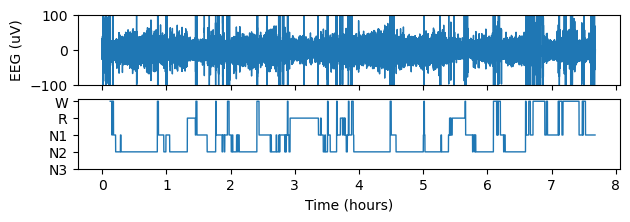

In [5]:
x_time_hours = np.arange(0, signal.shape[0]) / fs / 3600
fig, ax = plt.subplots(2, 1, figsize=(7, 2), sharex=True)

ax[0].plot(x_time_hours, signal['c4-m1'], lw=1)
ax[0].set_ylabel('EEG (uV)')
ax[0].set_ylim(-100, 100)

ax[1].plot(x_time_hours, annotations.stage, lw=1)
ax[1].set_yticks([1, 2, 3, 4, 5])
ax[1].set_yticklabels(['N3', 'N2', 'N1', 'R', 'W']);
ax[1].set_xlabel('Time (hours)');